대회 링크 https://dacon.io/competitions/open/235538/overview/description

 id : 선수 고유의 아이디<br>
 name : 이름<br>
 age : 나이<br>
 continent : 선수들의 국적이 포함되어 있는 대륙입니다<br>
 contract_until : 선수의 계약기간이 언제까지인지 나타내어 줍니다<br>
 position : 선수가 선호하는 포지션입니다. ex) 공격수, 수비수 등<br>
 prefer_foot : 선수가 선호하는 발입니다. ex) 오른발<br>
 reputation : 선수가 유명한 정도입니다. ex) 높은 수치일 수록 유명한 선수<br>
 stat_overall : 선수의 현재 능력치 입니다.<br>
 stat_potential : 선수가 경험 및 노력을 통해 발전할 수 있는 정도입니다.<br>
 stat_skill_moves : 선수의 개인기 능력치 입니다.<br>
 value : FIFA가 선정한 선수의 이적 시장 가격 (단위 : 유로) 입니다<br>

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('data/FIFA_train.csv')
test = pd.read_csv('data/FIFA_test.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [4]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [6]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [7]:
import matplotlib.pyplot as plt

In [8]:
top100 = train[:100]

In [13]:
top100.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [18]:
# 계약기간과 몸값의 상관관계 확인

x = top100.groupby('contract_until').mean()['value'].index # contract_until별 평균의 값 -> index
y = top100.groupby('contract_until').mean()['value'].values # contract_until별 평균의 값 -> values

y

array([25000000.        , 33326086.95652174, 48090909.09090909,
       40973684.21052632, 42260869.56521739, 41333333.33333334,
       50500000.        , 57000000.        ])

c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44228 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50557 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46384 missing from c

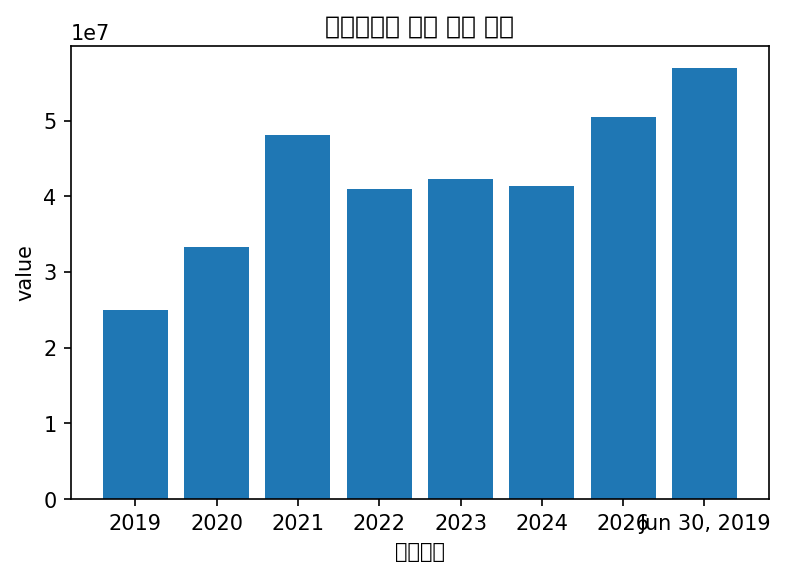

In [20]:
# 그래프

plt.figure(dpi=150) # 그래프 크기

plt.title('계약기간에 따른 평균 몸값')
plt.xlabel('계약기간')
plt.ylabel('value')

plt.bar(x,y)
plt.show()

In [21]:
top100

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,157,Ronaldo Cabrais,26,south america,2021,ST,right,1.0,83,83,4.0,28000000.0
96,161,N. Keïta,23,africa,2023,MF,right,2.0,83,88,4.0,34000000.0
97,163,T. Lemar,22,europe,2023,MF,left,3.0,83,89,4.0,35500000.0
98,164,K. Coman,22,europe,2023,MF,right,2.0,83,87,5.0,34000000.0


In [24]:
top100.groupby('contract_until').count()

,id,name,age,continent,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
contract_until,,,,,,,,,,,
2019,8,8,8,8,8,8,8,8,8,8,8
2020,23,23,23,23,23,23,23,23,23,23,23
2021,22,22,22,22,22,22,22,22,22,22,22
2022,19,19,19,19,19,19,19,19,19,19,19
2023,23,23,23,23,23,23,23,23,23,23,23
2024,3,3,3,3,3,3,3,3,3,3,3
2026,1,1,1,1,1,1,1,1,1,1,1
"Jun 30, 2019",1,1,1,1,1,1,1,1,1,1,1


In [29]:
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0
